In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.rcParams['font.sans-serif'] = ['SimHei']  
# Matplotlib中设置字体-黑体，解决Matplotlib中文乱码问题
plt.rcParams['axes.unicode_minus'] = False    
# 解决Matplotlib坐标轴负号'-'显示为方块的问题
sns.set(font='SimHei')                        
# Seaborn中设置字体-黑体，解决Seaborn中文乱码问题

In [2]:
df=pd.read_excel('附件2 慢性病及相关因素流调数据.xlsx')
df.head()

,Q1-ID,Q2-出生年,Q3-性别,Q4-民族,Q5-民族_其他,Q6-文化程度,Q7-婚姻状况,Q8-职业,Q9-是否吸烟,Q10-开始吸烟年龄,...,Q225-臀围,Q226-收缩压,Q227-舒张压,Q228-脉搏,Q229-胆固醇,Q230-血糖,Q231-高密度脂蛋白,Q232-低密度脂蛋白,Q233-甘油三酯,Q234-尿酸
0,10001,1983,2,1,NaN,4,1.0,9.0,3.0,NaN,...,92.0,98.0,62.0,70.0,3.79,4.61,1.59,1.88,0.91,210.4
1,10002,1994,2,1,NaN,3,1.0,13.0,3.0,NaN,...,88.0,104.0,70.0,80.0,4.24,4.59,1.59,2.17,0.81,270.6
2,10003,1976,1,1,NaN,4,2.0,4.0,1.0,16.0,...,95.0,104.0,70.0,80.0,4.84,4.13,1.33,2.92,1.59,298.2
3,10004,1984,1,1,NaN,5,2.0,12.0,3.0,NaN,...,106.0,126.0,82.0,72.0,5.20,4.68,0.92,3.60,1.84,327.9
4,10005,1968,1,1,NaN,4,2.0,9.0,1.0,20.0,...,97.0,106.0,70.0,70.0,5.10,4.41,1.37,3.15,1.87,350.9


In [3]:
data=df[df.columns[:199]]

In [4]:
data['Q2-出生年']=2023-data['Q2-出生年']

In [5]:
data['是否存在常见慢性病']=df['Q201-有没有被社区或以上医院的医生诊断过患有高血压'].map({
    1:1,
    2:0
})+df['Q208-您有没有被社区或以上医院的医生诊断患有糖尿病'].map({
    1:1,
    2:0
})

In [6]:
import numpy as np
data['是否存在常见慢性病']=data['是否存在常见慢性病'].map({
    np.nan:np.nan,
    0:0,
    1:1,
    2:1
    
})

In [7]:
data=data[data['是否存在常见慢性病'].isnull()==False]
data.reset_index(drop=True,inplace=True)

In [8]:

# 处理缺失值并生成新的标记列
for col in data.columns:
    if data[col].isnull().sum()>=1:
        new_col = col + "_Missing"
        data[new_col] = data[col].isna().astype(int)

In [9]:
# 处理定类变量（分类变量）列，采用众数填充
for col in data.columns:
    if data[col].dtype == 'object':  # 假设定类变量的类型为'object'
        mode_value = data[col].mode().iloc[0]  # 获取众数
        data[col] = data[col].fillna(mode_value)

# 处理定量变量（数值型变量）列，采用均值填充
for col in data.columns:
    if data[col].dtype == 'float64':  # 假设定量变量的类型为'float64'
        mean_value = data[col].mean()  # 获取均值
        data[col] = data[col].fillna(mean_value)

In [10]:
data

,Q1-ID,Q2-出生年,Q3-性别,Q4-民族,Q5-民族_其他,Q6-文化程度,Q7-婚姻状况,Q8-职业,Q9-是否吸烟,Q10-开始吸烟年龄,...,Q190-盐_Missing,Q191-酱油_Missing,Q192-醋_Missing,Q193-酱类_Missing,Q194-味精_Missing,Q195-工作主要属于以下何种活动_Missing,Q196-您做休闲、家务活动的强度_Missing,Q197-是否参加体育锻炼_Missing,Q198-体育锻炼的强度_Missing,Q199-平均每天体育锻炼时间_Missing
0,10001,40,2,1,壮族,4,1.0,9.0,3.0,24.767241,...,0,0,0,0,0,0,0,0,1,1
1,10002,29,2,1,壮族,3,1.0,13.0,3.0,24.767241,...,0,0,0,0,0,0,0,0,0,0
2,10003,47,1,1,壮族,4,2.0,4.0,1.0,16.000000,...,0,0,0,0,0,0,0,0,1,1
3,10004,39,1,1,壮族,5,2.0,12.0,3.0,24.767241,...,0,0,0,0,0,1,0,0,1,1
4,10005,55,1,1,壮族,4,2.0,9.0,1.0,20.000000,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7641,17705,60,2,1,壮族,3,2.0,10.0,3.0,24.767241,...,0,0,0,0,0,0,0,0,0,0
7642,17706,52,1,1,壮族,5,2.0,4.0,1.0,21.000000,...,0,0,0,0,0,0,0,0,0,0
7643,17707,70,2,1,壮族,3,2.0,10.0,3.0,24.767241,...,0,0,0,0,0,1,0,0,1,1
7644,17708,60,2,1,壮族,3,2.0,2.0,3.0,24.767241,...,0,0,0,0,0,1,0,0,1,1


In [11]:
from sklearn import preprocessing


for col in data.columns:
    if data[col].dtype == 'object':  
        data[col]=data[col].astype('str')
        enc=preprocessing.LabelEncoder()
        enc=enc.fit(data[col].unique())#训练LabelEncoder,将电脑，手表，手机编码为0,1,2
        data[col]=enc.transform(data[col])#使用训练好的LabelEncoder对原数据进行编码


In [12]:
data.shape

(7646, 394)

In [13]:
for i in  data.columns:
    if data[col].nunique()==1:
        del data[col]

In [14]:
data.shape

(7646, 394)

In [15]:
data.columns[:20]

Index(['Q1-ID', 'Q2-出生年', 'Q3-性别', 'Q4-民族', 'Q5-民族_其他', 'Q6-文化程度', 'Q7-婚姻状况',
       'Q8-职业', 'Q9-是否吸烟', 'Q10-开始吸烟年龄', 'Q11-平均每周吸烟天数', 'Q12-一天吸烟支数',
       'Q13-被动吸烟天数', 'Q14-被动吸烟天数.1', 'Q15-是否饮酒', 'Q16-饮酒年数', 'Q17-是否饮用高度白酒',
       'Q18-饮用频率', 'Q19-平均每次饮用量', 'Q20-是否饮用低度白酒'],
      dtype='object')

In [16]:
data.columns[8:]

Index(['Q9-是否吸烟', 'Q10-开始吸烟年龄', 'Q11-平均每周吸烟天数', 'Q12-一天吸烟支数', 'Q13-被动吸烟天数',
       'Q14-被动吸烟天数.1', 'Q15-是否饮酒', 'Q16-饮酒年数', 'Q17-是否饮用高度白酒', 'Q18-饮用频率',
       ...
       'Q190-盐_Missing', 'Q191-酱油_Missing', 'Q192-醋_Missing',
       'Q193-酱类_Missing', 'Q194-味精_Missing', 'Q195-工作主要属于以下何种活动_Missing',
       'Q196-您做休闲、家务活动的强度_Missing', 'Q197-是否参加体育锻炼_Missing',
       'Q198-体育锻炼的强度_Missing', 'Q199-平均每天体育锻炼时间_Missing'],
      dtype='object', length=386)

In [17]:
#'Q2-出生年', 'Q3-性别', 'Q4-民族', 'Q5-民族_其他', 'Q6-文化程度', 'Q7-婚姻状况','Q8-职业'

In [18]:

aaa='''Q2-出生年
Q3-性别
Q4-民族
Q5-民族_其他
Q6-文化程度
Q7-婚姻状况
Q5-民族_其他_Missing
Q7-婚姻状况_Missing
Q8-职业_Missing
'''
for i in aaa.split():
    del data[i]

In [19]:
data.to_csv('./Q3/数据清洗.csv',index=None)

In [20]:
#data=pd.read_csv('./Q3/数据清洗.csv')

In [21]:
data

,Q1-ID,Q8-职业,Q9-是否吸烟,Q10-开始吸烟年龄,Q11-平均每周吸烟天数,Q12-一天吸烟支数,Q13-被动吸烟天数,Q14-被动吸烟天数.1,Q15-是否饮酒,Q16-饮酒年数,...,Q190-盐_Missing,Q191-酱油_Missing,Q192-醋_Missing,Q193-酱类_Missing,Q194-味精_Missing,Q195-工作主要属于以下何种活动_Missing,Q196-您做休闲、家务活动的强度_Missing,Q197-是否参加体育锻炼_Missing,Q198-体育锻炼的强度_Missing,Q199-平均每天体育锻炼时间_Missing
0,10001,9.0,3.0,24.767241,6.597502,15.827797,1.0,4.617782,2.0,27.569575,...,0,0,0,0,0,0,0,0,1,1
1,10002,13.0,3.0,24.767241,6.597502,15.827797,1.0,4.617782,2.0,27.569575,...,0,0,0,0,0,0,0,0,0,0
2,10003,4.0,1.0,16.000000,7.000000,20.000000,2.0,5.000000,2.0,27.569575,...,0,0,0,0,0,0,0,0,1,1
3,10004,12.0,3.0,24.767241,6.597502,15.827797,2.0,2.000000,2.0,27.569575,...,0,0,0,0,0,1,0,0,1,1
4,10005,9.0,1.0,20.000000,7.000000,10.000000,1.0,4.617782,2.0,27.569575,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7641,17705,10.0,3.0,24.767241,6.597502,15.827797,2.0,7.000000,2.0,27.569575,...,0,0,0,0,0,0,0,0,0,0
7642,17706,4.0,1.0,21.000000,7.000000,15.000000,2.0,7.000000,2.0,27.569575,...,0,0,0,0,0,0,0,0,0,0
7643,17707,10.0,3.0,24.767241,6.597502,15.827797,2.0,7.000000,2.0,27.569575,...,0,0,0,0,0,1,0,0,1,1
7644,17708,2.0,3.0,24.767241,6.597502,15.827797,2.0,7.000000,2.0,27.569575,...,0,0,0,0,0,1,0,0,1,1


In [22]:
data.columns

Index(['Q1-ID', 'Q8-职业', 'Q9-是否吸烟', 'Q10-开始吸烟年龄', 'Q11-平均每周吸烟天数', 'Q12-一天吸烟支数',
       'Q13-被动吸烟天数', 'Q14-被动吸烟天数.1', 'Q15-是否饮酒', 'Q16-饮酒年数',
       ...
       'Q190-盐_Missing', 'Q191-酱油_Missing', 'Q192-醋_Missing',
       'Q193-酱类_Missing', 'Q194-味精_Missing', 'Q195-工作主要属于以下何种活动_Missing',
       'Q196-您做休闲、家务活动的强度_Missing', 'Q197-是否参加体育锻炼_Missing',
       'Q198-体育锻炼的强度_Missing', 'Q199-平均每天体育锻炼时间_Missing'],
      dtype='object', length=385)

In [23]:
from collections import Counter
Counter(data['是否存在常见慢性病'])

Counter({0.0: 6887, 1.0: 759})

In [24]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from lightgbm import LGBMRegressor,LGBMClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
# 分离X和Y
bb=data.columns[1:]
bb=bb.drop('是否存在常见慢性病')

X = data[bb]
y = data['是否存在常见慢性病']

In [88]:
import sys
!{sys.executable} -m pip install imblearn -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 9.2/9.2 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


ERROR: Could not install packages due to an OSError: [WinError 5] 拒绝访问。: 'C:\\Users\\Stream\\AppData\\Roaming\\spsspro\\spsspro\\lib\\python\\Lib\\site-packages\\~~learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



In [25]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [27]:
from collections import Counter
Counter(y_resampled)

Counter({0.0: 6887, 1.0: 6887})

In [28]:
X=X_resampled
Y=y_resampled

In [33]:

##'Q2-出生年', 'Q3-性别',  'Q6-文化程度', 'Q7-婚姻状况','Q8-职业'
#年龄、性别、婚姻状况、文化程度、职业
# 构建xgboost回归模型
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X, Y)
xgb_y_pred = xgb_model.predict(X)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y, xgb_y_pred))
print("REC",recall_score(Y, xgb_y_pred))
print("F-score",f1_score(Y, xgb_y_pred))
print(classification_report(Y, xgb_y_pred))




# 构建决策树回归模型
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, Y)
tree_y_pred = tree_model.predict(X)

# 输出决策树模型评价结果
print('决策树模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y, tree_y_pred))
print("REC",recall_score(Y, tree_y_pred))
print("F-score",f1_score(Y, tree_y_pred))
print(classification_report(Y, tree_y_pred))

# 构建随机森林回归模型
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X, Y)
rf_y_pred = rf_model.predict(X)

# 输出随机森林模型评价结果
print('随机森林模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y, rf_y_pred))
print("REC",recall_score(Y, rf_y_pred))
print("F-score",f1_score(Y, rf_y_pred))
print(classification_report(Y, rf_y_pred))

# 构建LGBM回归模型
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
lgbm_model.fit(X, Y)
lgbm_y_pred = lgbm_model.predict(X)


# 输出LGBM模型评价结果
print('LGBM模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y, lgbm_y_pred))
print("REC",recall_score(Y, lgbm_y_pred))
print("F-score",f1_score(Y, lgbm_y_pred))
print(classification_report(Y, lgbm_y_pred))

# 构建Adaboost回归模型
ada_model = AdaBoostClassifier(n_estimators=100)
ada_model.fit(X, Y)
ada_y_pred = ada_model.predict(X)
# 输出Adaboost模型评价结果
print('Adaboost模型评价结果：')
print("ACC",accuracy_score(Y, ada_y_pred))
print("REC",recall_score(Y, ada_y_pred))
print("F-score",f1_score(Y, ada_y_pred))
print(classification_report(Y, ada_y_pred))

# 构建GBDT回归模型
gbdt_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(X, Y)
gbdt_y_pred = gbdt_model.predict(X)

# 输出GBDT模型评价结果
print('GBDT模型评价结果：')
print("ACC",accuracy_score(Y, gbdt_y_pred))
print("REC",recall_score(Y, gbdt_y_pred))
print("F-score",f1_score(Y, gbdt_y_pred))
print(classification_report(Y, gbdt_y_pred))


[20:18:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost模型评价结果：
ACC 0.8132713808624945
REC 0.8205314360389139
F-score 0.8146172697131325
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.81      6887
         1.0       0.81      0.82      0.81      6887

    accuracy                           0.81     13774
   macro avg       0.81      0.81      0.81     13774
weighted avg       0.81      0.81      0.81     13774

决策树模型评价结果：
ACC 1.0
REC 1.0
F-score 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6887
         1.0       1.00      1.00      1.00      6887

    accuracy                           1.00     13774
   macro avg      

In [101]:
import sys
!{sys.executable} -m pip install shap -i https://pypi.tuna.tsinghua.edu.cn/simple

In [36]:
import shap
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 初始化SHAP模型
explainer = shap.Explainer(xgb_model)

# 计算SHAP值
shap_values = explainer(X)

In [37]:
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)

In [38]:
# 输出每个特征的SHAP值（绝对值）
features=[]
abs_mean_shap_values=[]
for i, feature in enumerate(X.columns):
    abs_mean_shap_value = np.abs(shap_df.values[:, i]).mean()
    features.append(feature)
    abs_mean_shap_values.append(abs_mean_shap_value)


In [39]:
tt=pd.DataFrame(features,columns=['features'])
tt['shap_values']=abs_mean_shap_values

In [40]:
tt1=pd.read_excel('./Q3/归类.xlsx')
tt1

,指标,归类
0,Q8-职业,工作性质
1,Q9-是否吸烟,吸烟
2,Q10-开始吸烟年龄,吸烟
3,Q11-平均每周吸烟天数,吸烟
4,Q12-一天吸烟支数,吸烟
...,...,...
378,Q195-工作主要属于以下何种活动_Missing,运动
379,Q196-您做休闲、家务活动的强度_Missing,运动
380,Q197-是否参加体育锻炼_Missing,运动
381,Q198-体育锻炼的强度_Missing,运动


In [41]:
tt['归类']=tt1['归类']

In [45]:
tt

,features,shap_values,归类
0,Q8-职业,0.172971,工作性质
1,Q9-是否吸烟,0.077098,吸烟
2,Q10-开始吸烟年龄,0.021781,吸烟
3,Q11-平均每周吸烟天数,0.001833,吸烟
4,Q12-一天吸烟支数,0.022592,吸烟
...,...,...,...
378,Q195-工作主要属于以下何种活动_Missing,0.256483,运动
379,Q196-您做休闲、家务活动的强度_Missing,0.000000,运动
380,Q197-是否参加体育锻炼_Missing,0.000000,运动
381,Q198-体育锻炼的强度_Missing,0.000000,运动


In [44]:
a=tt.groupby('归类').sum()
a

,shap_values
归类,
吸烟,0.126898
工作性质,0.172971
运动,0.493754
饮酒,0.240869
饮食习惯,1.791391


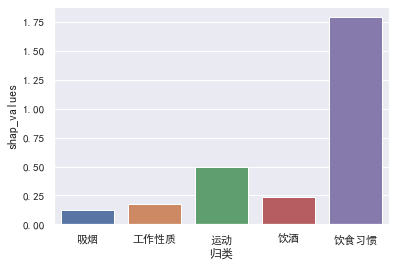

In [46]:


# 使用Seaborn绘制柱状图
sns.barplot(x='归类', y='shap_values', data=a.reset_index())
plt.savefig('./Q3/归类')
# 显示图形
plt.show()

In [47]:
tt.to_excel('./Q3/shape值.xlsx',index=None)  